In [65]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/UiT-sok-2013-h24/arbeidskrav2/5a3131437da15bf77fa821ca19fd4503b7e334cd/datasett1.csv"
data1 = pd.read_csv(url)

Datasettet inneholder informasjon om en rekke lands import og eksport (IMP og EXP), så vel som deres totale BNP (gdp) og befolkning (pop). 

Trade Openness er gitt av følgende formel:

$$ Degree \; of \; openness = \dfrac{X + M}{GDP} \;

,der \; X \; = \; eskport \;  og \;  I \; =  \;import $$

1. Kalkuler "openness" til alle land i datasettet. Rapporter åpenheten til Norge, og forklare hva nummeret betyr. Har Norge sette en endring i trade openness i perioden datasettet omhandler (2018-2021).

In [9]:
data1['Openness'] = (data1['EXP'] + data1['IMP'])/ data1['gdp'] * 100
data1['gdp per capita'] = (data1['gdp'] / data1['pop'])
data1['TIME'] = data1['TIME'].astype(int)

In [10]:
unique_countries = data1['LOCATION'].unique()

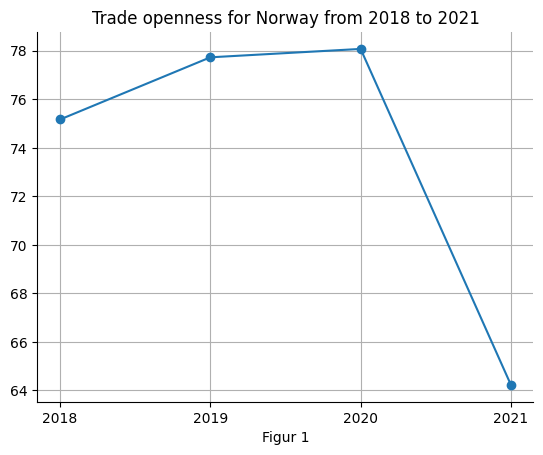

In [11]:
unique_countries = data1['LOCATION'].unique()
norge_data = data1[(data1['LOCATION'] == 'NOR') & (data1['TIME'].between(2018, 2021))]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(norge_data['TIME'],norge_data['Openness'],marker = 'o')

ax.set_title('Trade openness for Norway from 2018 to 2021')
ax.set_xlabel('Figur 1')
ax.set_xticks(norge_data['TIME'].unique())
ax.grid(True);

Trade Openness er gitt av følgende formel:

$$ Degree \; of \; openness = \dfrac{X + M}{GDP} \;

,der \; X \; = \; eskport \;  og \;  I \; =  \;import $$


Degree og openness eller graden av åpenhet måler landets økonomiske forbindelser med andre land. Slike forbindelser består av utveksling av varer og tjenester, eller i utveksling av innsatsfaktorer. 

I Norge økte graden av åpenhet fra 2019 til 2020, i 2021 var det en betydelig nedgang til nivåer som ligger betraktelig under nivået fra 2018. 

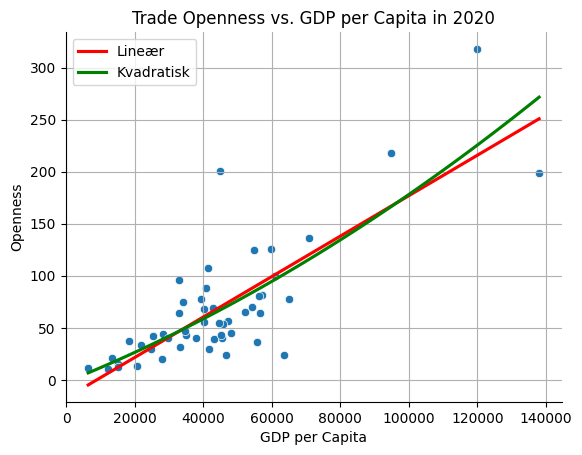

In [ ]:
data_for_2020 = data1[data1['TIME'] == 2020]

fig,ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.regplot(x='gdp per capita', y='Openness', data=data_for_2020, ci=None, scatter=False, order=1, ax=ax, label='Lineær', line_kws={'color': 'red'})
sns.regplot(x='gdp per capita', y='Openness', data=data_for_2020, ci=None, scatter=False, order=2, ax=ax, label='Kvadratisk', line_kws={'color': 'green'})
sns.scatterplot(x='gdp per capita', y='Openness', data=data_for_2020)

ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.grid(True)
ax.legend();

In [13]:
data_for_2020['log gdp per capita'] = np.log(data_for_2020['gdp per capita'])

C:\Users\gusta\AppData\Local\Temp\ipykernel_2400\2792877382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_2020['log gdp per capita'] = np.log(data_for_2020['gdp per capita'])


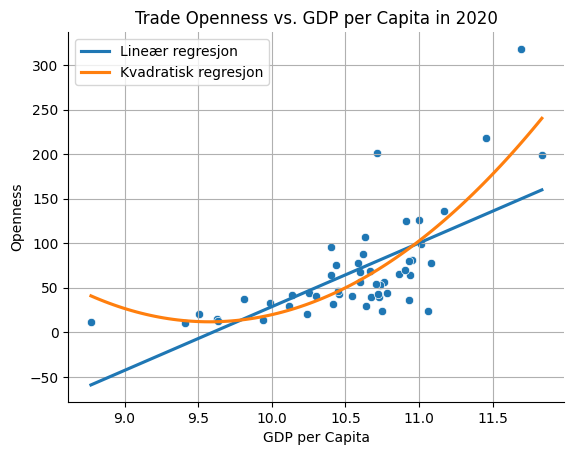

In [58]:
fig, ax = plt.subplots()

sns.regplot(x='log gdp per capita', y='Openness', data=data_for_2020, ci=None, label='Lineær regresjon', order=1, ax=ax, scatter=False)
sns.regplot(x='log gdp per capita', y='Openness', data=data_for_2020, ci=None, label='Kvadratisk regresjon', order=2, ax=ax,scatter=False)
sns.scatterplot(x='log gdp per capita', y='Openness', data=data_for_2020)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.grid(True)
ax.legend();

In [15]:
url2 = "https://raw.githubusercontent.com/UiT-sok-2013-h24/arbeidskrav2/5a3131437da15bf77fa821ca19fd4503b7e334cd/datasett2.csv"

data2 = pd.read_csv(url2)

Datasettet inneholder en del variabler om handelsdata mellom Tyskland og en rekke andre land fra 2004. De variablene som streng tatt er viktigst å se på er "pcode" (ISO-koden for handelspartner), overlapp, og simil_index.

1. Bruk datasettet til å konstruere en graf med en kvadratisk regresjonslinje,hvor handelsoverlapp-verdiene er på y-aksen og Similarity Indeks-verdiene er på x-aksen. Forklar kort hva grafen betyr.

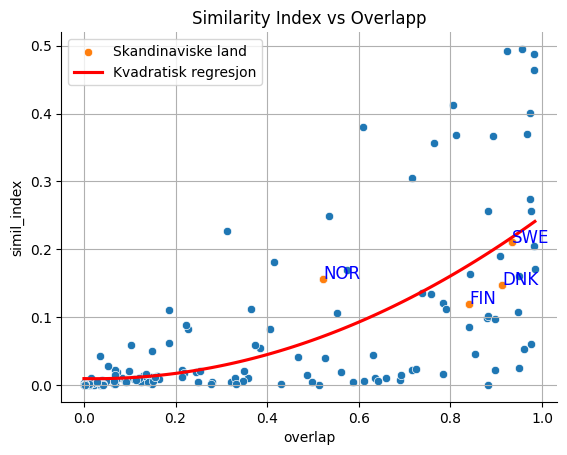

In [64]:
data3 = data2[data2['pcode'].isin(['NOR', 'SWE', 'FIN', 'DNK'])]  # Velger ut spesifikke land

fig, ax = plt.subplots()

sns.scatterplot(data=data2, x='overlap', y='simil_index')
sns.scatterplot(data=data3, x='overlap',y='simil_index', label ='Skandinaviske land')

sns.regplot(data=data2, x='overlap', y='simil_index', ci=False, scatter=False, color='red', order=2, label='Kvadratisk regresjon')

# Loop gjennom data3 og legg til landnavn på deres koordinater
for i, row in data3.iterrows():
    ax.text(row['overlap'], row['simil_index'], row['pcode'], color='blue', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Similarity Index vs Overlapp')
ax.legend(loc='best')
ax.grid(True);